# Outpainting

### This notebook introduces image outpainting of the input images. The implementation incorporates mask selection using the SAM model to select the area to be kept and applies diffusion by using Stable Diffusion model. In this notebook, we will provide a step-by-step guide to outpainting an image.

Define an input image

In [1]:
from PIL import Image
import os, sys

input_path = '../inputs/background-replacement/aston.png'
input_image = Image.open(input_path)

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(os.path.dirname(current_dir), '..'))
sys.path.append(os.path.join(parent_dir, 'code'))

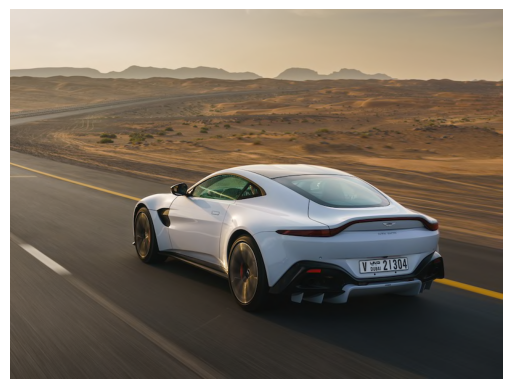

In [2]:
from matplotlib import pyplot as plt

plt.imshow(input_image)
plt.axis('off')
plt.show()

Define by how many pixels the original image should be extended in each direction

In [3]:
extend_left = 300
extend_right = 0
extend_up = 0
extend_down = 0

Define the prompt and the number of diffusion steps

In [4]:
prompt = "highway by the desert, cactus vegetation, close shot, 35 mm, realism, octane render, 8 k, exploration, \
        cinematic, pixbay, modernist, realistic, unreal engine, hyper detailed, photorealistic, maximum detail, \
        volumetric light, moody cinematic epic concept art, seamless transition to the environment"
steps = 20

Load and prepare the model

In [6]:
from outpaint_sd import outpaint_stablediffusion

coordinates = [extend_left, extend_right, extend_up, extend_down]
output = outpaint_stablediffusion(input_image, prompt, coordinates, steps)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

: 

Extend the image frame by adding an white image of the new shape as a base, and paste the original image on top of it.
Create an outpainting mask.

In [ ]:
import numpy as np
from operations_image import expand_white_areas_outpainting

width, height = input_image.size
new_width = width + extend_left + extend_right
new_height = height + extend_up + extend_down

# new image with extended blank spaces
extended_image = Image.new('RGB', (new_width, new_height), color='white')
extended_image.paste(input_image, (extend_left, extend_up))

# new mask image
extended_mask = Image.new('L', (new_width, new_height), color='white')
extended_mask.paste(Image.new('L', input_image.size, color='black'), (extend_left, extend_up))
extended_mask = expand_white_areas_outpainting(extended_mask, 5)

Visualise the base image and mask

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(extended_image)
axs[0].axis('off')
axs[0].set_title('Extended image')

# Display the second image in the right subplot
axs[1].imshow(extended_mask)
axs[1].axis('off')
axs[1].set_title('Extended mask')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

Apply the image and mask to the model, and reshape the $512$ x $512$ output to the new image size.

In [ ]:
output_image = pipe(prompt=prompt, image=extended_image, mask_image=extended_mask,  guidance_scale=7.5, num_inference_steps=steps).images[0]
resized_output_image = output_image.resize((new_width, new_height))

In [ ]:
plt.imshow(resized_output_image)
plt.axis('off')
plt.show()

Visalise the result

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(input_image)
axs[0].axis('off')
axs[0].set_title('Original image')

# Display the second image in the right subplot
axs[1].imshow(resized_output_image)
axs[1].axis('off')
axs[1].set_title('Final image')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()